In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
R1 =np.array([7.157629234,7.027521578,7.233319545,7.271859649,7.359659091,7.415839695,7.559600683,7.733134328,
7.879421365,7.811351145,7.896648193,8.081038288,8.217494624,8.287934866,8.367003766,8.44049278,
8.591939698,8.941874622,9.33248711,10.07118501,10.78731323])

R2 = np.array([7.756287425,8.088554585,8.361451493,8.756389408,9.280571229,10.20778441,11.35640755,12.12115596,
12.35851103,12.76701943,13.37016586,14.43009649,15.5806567,15.83700129,16.89187908,17.48836415,17.84697524,
18.96713392,19.57255522,20.91493578,22.49161088])

R3= np.array([9.922954856,11.49973659,12.89925311,16.38388228,17.74185969,19.52521182,20.48381395,21.53225974,
22.58876829,24.02104851,25.31927875,27.55606369,27.47258702,28.66775075,28.82134758,28.98830028,29.87263686,
31.00062468,31.61780482,33.34143508,35.85500638])

R4 = np.array([14.59629104,21.80975214,23.37611719,26.54303279,28.33959394,29.34549718,31.97670426,33.65386836,
               35.62075,37.99216444,39.0450395,40.49723777,40.6833662,44.05910949,45.78655716,46.37071334,
                48.43434194,48.85648428,50.21687571,51.8677718,54.3273974])

R5 = np.array([20.06802817,23.90553668,27.39902492,29.40583565,30.58253766,33.63133184,35.09135456,38.16721915,
38.99704263,40.85341887,41.53184127,43.11307806,43.90538678,46.8512766,46.71030691,48.37677616,49.79608595,
50.46242356,51.812,53.34364934,54.79119])


In [3]:
t = np.linspace( 300, 3600, num = 34 )
r = np.array([5.65, 8.06, 10.56,13.23,16.09,19.00,21.94,24.93,27.94,30.98,34.08,37.19,
    40.36,43.55,46.78,50.05,53.35,56.67,60.06,63.48,66.91,70.39,73.91,77.49,
    81.04,84.70,88.33,92.04,95.76,99.54,103.3,107.2,111.1,115.0])

I1 = np.array([0.561,0.811,0.967,1.14,1.672,1.834,2.93,3.35,3.37,3.93,
    4.15,4.44,4.65,5.22,5.31,5.54,5.97,6.62,7.37,8.54,9.45])
V1 = np.array([0.031,0.044,0.054,0.064,0.095,0.105,0.171,0.2,0.205,0.237,0.253
     ,0.277,0.295,0.334,0.343,0.361,0.396,0.457,0.531,0.664,0.787])

I2 = np.array([3.34,4.58,5.36,6.42,7.16,8.21,10.06,10.9,11.33,11.84,12.42,13.68,
      15.38,15.54,16.87,17.85,18.58,19.19,19.92,21.8,23.9])
V2 = np.array([0.2,0.286,0.346,0.434,0.513,0.647,0.882,1.02,1.081,1.167,1.282,
      1.524,1.85,1.9,2.2,2.41,2.56,2.81,3.01,3.52,4.15])

I3 = np.array([0.56,0.91,1.2,2.02,2.46,3.06,3.4,3.84,4.29,4.97,5.61,6.68,7.19,
               7.37,7.81,7.9,8.51,9.31,10.13,11.3,13.01])
V3 = np.array([ 7.31, 10.25, 12.05, 15.97, 17.96, 20.3 , 21.5 , 23.1 , 24.6 ,26.8 , 28.7 
      , 31.4 , 33.9 , 33.3 , 35.1 , 35.3 , 36.9 , 38.9 ,41.5 , 43.9 , 47.0 ])


I4 = np.array([13.4,23.4,25.6,30.5,33,35.4,39.9,43.3,48.8,52.3,55.7,59.3,63.9,
      68.5,76.1,75.7,81.3,85.9,87.7,92.9,99.9])
V4 = np.array([1.51,3.94,4.62,6.25,7.22,8.02,9.85,11.25,13.42,15.34,16.79,18.54,
      20.07,23.3,26.9,27.1,30.4,32.4,34,37.2,41.9])

I5 = np.array([21.3,25.9,32.1,35.9,38.5,44.6,47.1,54.3,56.3,60.4,63,67.9,
      71.1,75.2,78.2,82.2,86.1,88.3,93.5,98.4,100.1])
V5 = np.array([3.3,4.78,6.79,8.15,9.09,11.58,12.76,16,16.95,19.05,20.2,22.6,24.1,27.2,28.2,
      30.7,33.1,34.4,37.4,40.4,42.3])



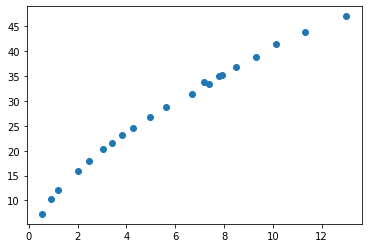

In [4]:
plt.scatter(I3, V3)

#  Formula para hallar $\beta $ que minimiza el error cuadratico medio (MCO)
$ \beta = (X^{T}X)^{-1} X^{T} Y$

In [5]:
#El metodo recibe 2 arrays y nos da los parametros para la regresion lineal que minimiza el error cuadratico
def MinCua(a,b):
    
    #Se convierten en arrays de numpy para poder usar los metodos de dicha libreria
    xt = np.array(a)*(1/1000)
    Y = np.array(b)

    #se añade columna de unos(1) para representar el termino independiente
    C1 =  np.ones(len(xt))
    
    """" 
    Se transpone X debido a que la matriz de parametros beta resultante, tiene la forma de 1 fila y 2 coumnas
    por tanto no esta en la forma vectorial sino en la vectorial transpuesta 
    """
    
    X = np.array([C1, xt]).T

    # @ = Multiplicacion Matricial
    # X.T = np.transpose(x) = X transpuesta
    B = np.linalg.inv(X.T @ X) @ X.T @ Y

    #Esta operacion nos da como resultado una lista con 2 parametros, el primero representa la variable independiente
    # y el segundo la pendiente optima para minimizar el error cuadratico, esta formula se demostro en algebra lineal
    #b = B[0]
    #m = B[1]
    return [B[0],B[1],xt, X, Y]

Metodo para graficar los datos y aproximarlos a una regresion lineal minimizando el error cuadratico

In [6]:
def graf(c,d, n1, n2, u, voltios):
    B = MinCua(c,d)
    b = B[0]
    m = B[1]
    i1 = B[2]
    T = B[3]
    v1 = B[4]

    if u == True:
        axs[n1,n2].scatter(i1,v1, alpha = 0.7)
        axs[n1,n2].plot([min(i1), max(i1)] , [m*min(i1) + b, m*max(i1) + b], c = "orange" )
        axs[n1,n2].set_xlabel("corriente(Amperios)")
        axs[n1,n2].set_ylabel("Voltaje (V)")
        axs[n1,n2].set_title('Corriente VS Voltaje'+ voltios)
    elif u == False:
        plt.scatter(i1,v1, alpha = 0.7)
        plt.plot([min(i1), max(i1)] , [m*min(i1) + b, m*max(i1) + b], c = "orange" )
        plt.xlabel("Temperatura(K)")
        plt.ylabel("Resistividad ($\mu \Omega$")
        plt.title('Resistividad VS Temperatura')
        plt.show()
    elif u == 2:
        axs[n1].scatter(i1,v1, alpha = 0.7)
        axs[n1].plot([min(i1), max(i1)] , [m*min(i1) + b, m*max(i1) + b], c = "orange" )
        axs[n1].set_xlabel("corriente(Amperios)")
        axs[n1].set_ylabel("Voltaje (V)")
        axs[n1].set_title('Corriente VS Voltaje'+ voltios)
    elif u == 3:
        axs[n1].scatter(i1,v1, alpha = 0.7)
        axs[n1].plot([min(i1), max(i1)] , [m*min(i1) + b, m*max(i1) + b], c = "orange" )
        axs[n1].set_xlabel("Temperatura(K)")
        axs[n1].set_ylabel("Resistividad ($\mu \Omega$")
        axs[n1].set_title('Resistividad VS Temperatura')
    else:
        return B

In [7]:
def res(teo, var ,B, ax):
    ex = B[0] + B[1]*var
    sns.residplot(teo, ex, lowess=True, color="g", ax = ax )
    ax.set_title('Residual')

In [8]:
def Cuadratica(x, a, b, c):
   return (a*(x**2))+ b*x + c

In [9]:
def ajuCua(i, v, nom):
    # Ajuste de los datos
    # curve_fit devuelve dos variables, los parámetros del ajuste y
    # la matriz de covarianza
    popt, bas = curve_fit(Cuadratica, i, v)

    # Ahora creo una curva teórica a partir del modelo ajustado
    times = np.arange(i[0], i[-1], 0.0001)
    model = Cuadratica(times, *popt)

    axs[0].scatter(i, v)
    axs[0].plot(times, model, '-r')
    axs[0].set_xlabel("corriente(Amperios)")
    axs[0].set_ylabel("Voltaje (V)")
    axs[0].set_title('Corriente VS Voltaje '+ nom)
    
    ex = popt[2] + (popt[1]*i)+(popt[0]*(i**2))
    sns.residplot(v, ex, lowess=True, color="g", ax = axs[1] )
    axs[1].set_title('Residual')
    
    # Guardo la grafica
    plt.savefig("ajuste"+nom+".png")
    
    print('El R es: '+ str(popt[1]))

    # Para mostrar la gráfica por pantalla
    plt.show()
    

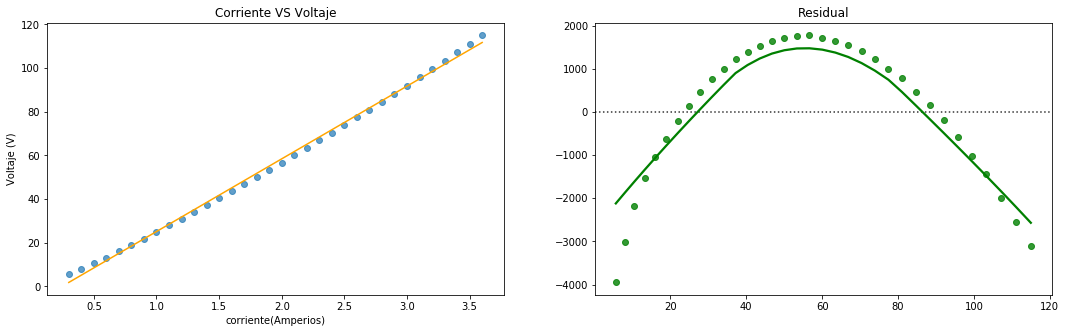

In [10]:
fig, axs = plt.subplots(1,2, figsize =  (18,5))
graf(t,r,0,0, 2, "")

res(r,t, graf(t,r,0,0, -1, ''), axs[1] )

plt.savefig("guia.png")

El R en 295,79 K es: 5.039079578335465


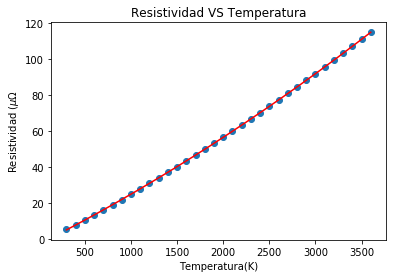

In [11]:
popt, bas = curve_fit(Cuadratica, t, r)

# Ahora creo una curva teórica a partir del modelo ajustado 295,79 g = 76.95
times = np.arange(t[0], t[-1], 0.01)
model = Cuadratica(times, *popt)

plt.scatter(t, r)
plt.plot(times, model, '-r')
plt.xlabel("Temperatura(K)")
plt.ylabel("Resistividad ($\mu \Omega$")
plt.title('Resistividad VS Temperatura')
# Guardo la grafica
plt.savefig("RvsT.png")
    
print('El R en 295,79 K es: '+ str(popt[2] + (popt[1]*295.79)+(popt[0]*(295.79**2))))
# Para mostrar la gráfica por pantalla

[ 828.28186155  957.60243827 1074.03022236 1140.35124953 1179.04877258
 1278.65898331 1326.02679548 1425.10970799 1451.67636865 1510.85489985
 1532.39473889 1582.41752375 1607.38695976 1699.66721194 1695.27138931
 1747.10747954 1791.03334403 1811.5851377  1853.07194929 1899.9318546
 1943.9996665 ]\


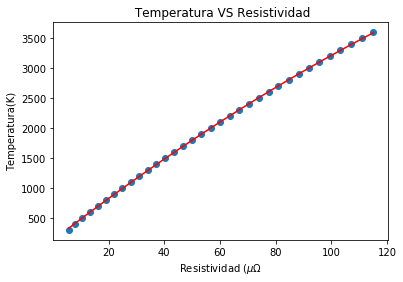

In [12]:
popt, bas = curve_fit(Cuadratica, r, t)

# Ahora creo una curva teórica a partir del modelo ajustado 295,79 g = 76.95
times = np.arange(r[0], r[-1], 0.001)
model = Cuadratica(times, *popt)
plt.scatter(r, t)
plt.plot(times, model, '-r')
plt.ylabel("Temperatura(K)")
plt.xlabel("Resistividad ($\mu \Omega$")
plt.title(' Temperatura VS Resistividad')
# Guardo la grafica
plt.savefig("TvsR.png")


a = R5
print(str(popt[2] + (popt[1]*a)+(popt[0]*(a**2)))+ "\\")

# Para mostrar la gráfica por pantalla

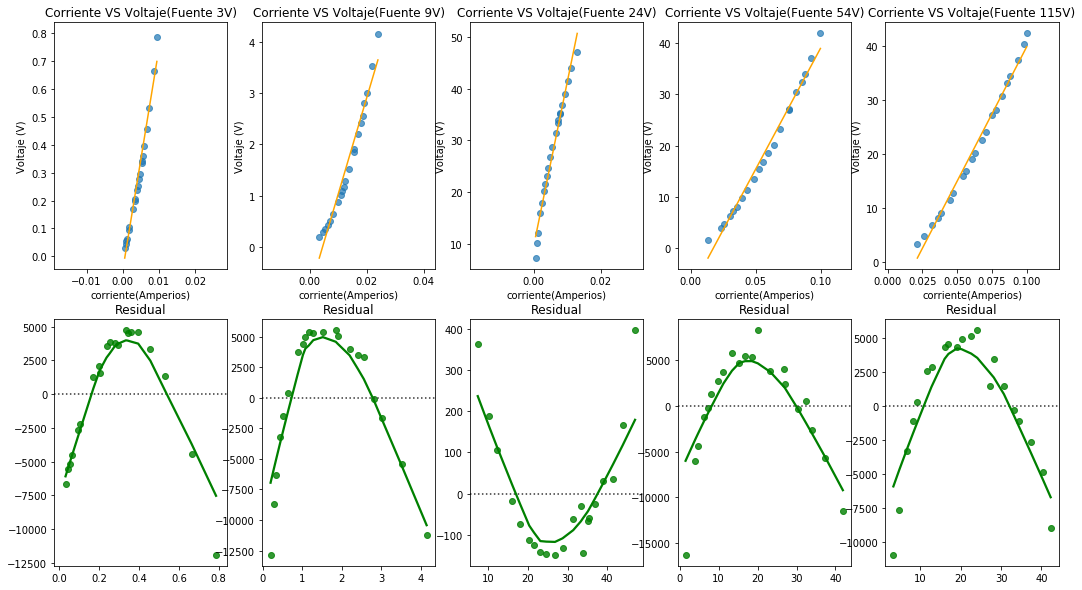

In [13]:
fig, axs = plt.subplots(2,5, figsize =  (18,10))
graf(I1,V1, 0, 0, True, '(Fuente 3V)')
graf(I2,V2, 0, 1, True, '(Fuente 9V)')
graf(I3,V3,0,2, True, '(Fuente 24V)')
graf(I4,V4,0,3, True, '(Fuente 54V)')
graf(I5,V5,0,4, True, '(Fuente 115V)')

res(V1,I1, graf(V1,I1,0,0, -1, ''), axs[1,0] )
res(V2,I2, graf(V2,I2,0,1, -1, ''), axs[1,1] )
res(V3,I3, graf(V3,I3,0,2, -1, ''), axs[1,2] )
res(V4,I4, graf(V4,I4,0,3, -1, ''), axs[1,3] )
res(V5,I5, graf(V5,I5,0,4, -1, ''), axs[1,4] )

El R es: 38.82931160664413


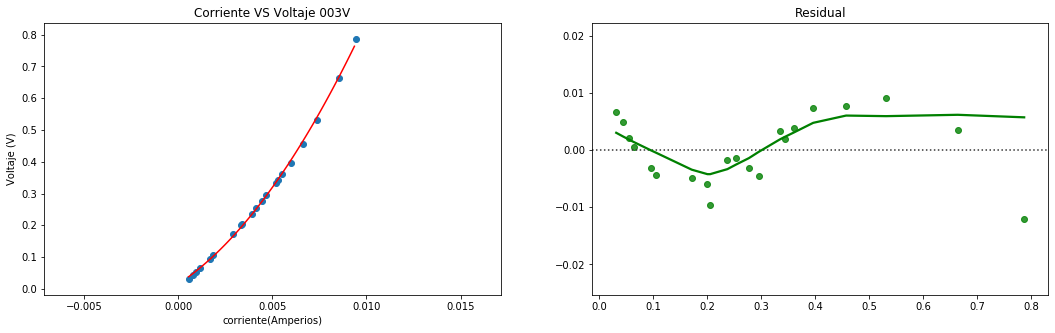

El R es: 16.578905866261064


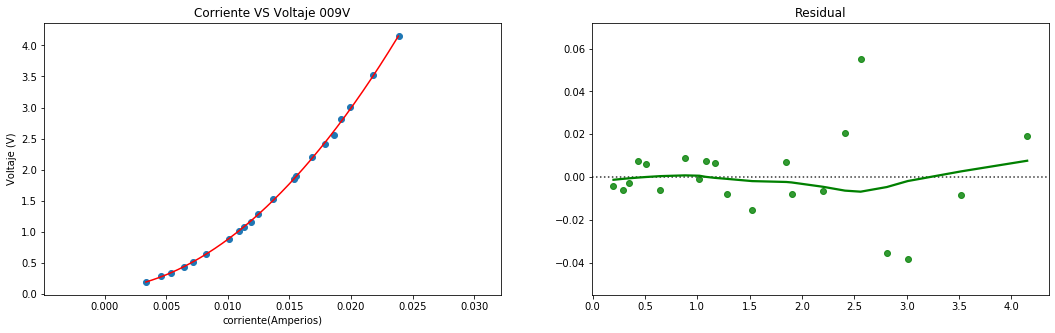

El R es: 4645.83529431604


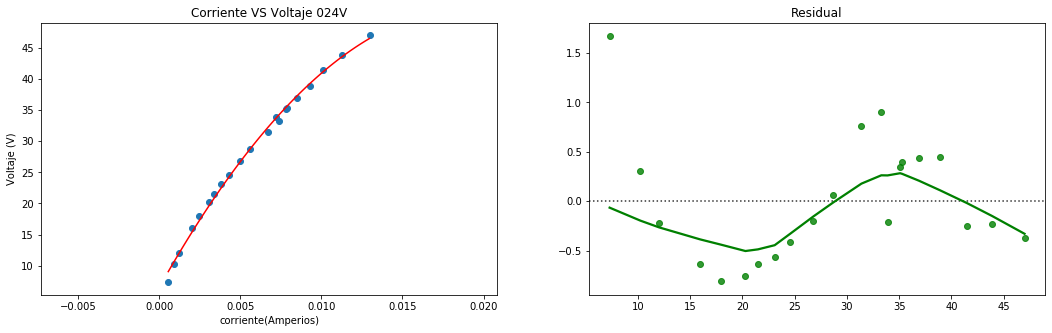

El R es: 199.68509755966798


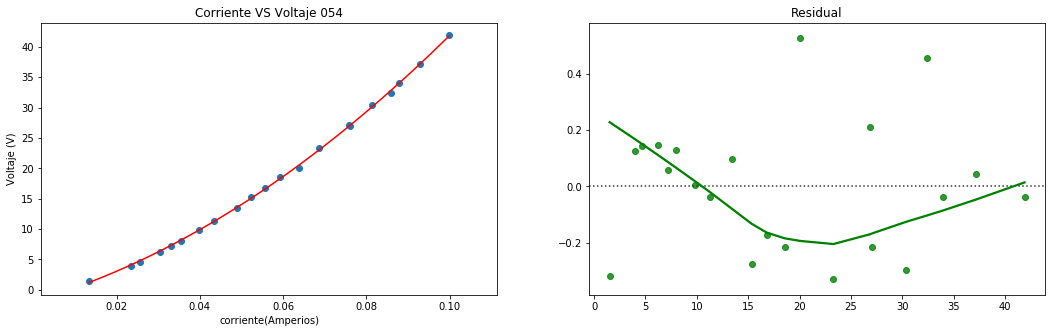

El R es: 215.2544456905749


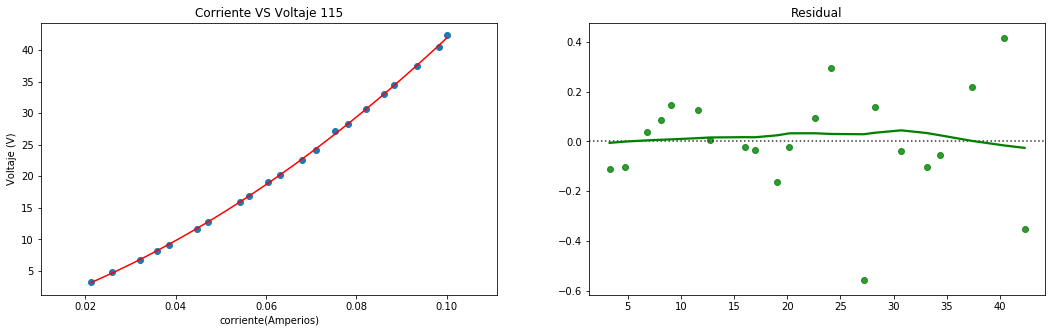

In [14]:
fig, axs = plt.subplots(1,2, figsize =  (18,5))
ajuCua(I1*(1/1000), V1, '003V')

fig, axs = plt.subplots(1,2, figsize =  (18,5))
ajuCua(I2*(1/1000), V2, '009V')

fig, axs = plt.subplots(1,2, figsize =  (18,5))
ajuCua(I3*(1/1000), V3, '024V')

fig, axs = plt.subplots(1,2, figsize =  (18,5))
ajuCua(I4*(1/1000), V4, '054')

fig, axs = plt.subplots(1,2, figsize =  (18,5))
ajuCua(I5*(1/1000), V5, '115')


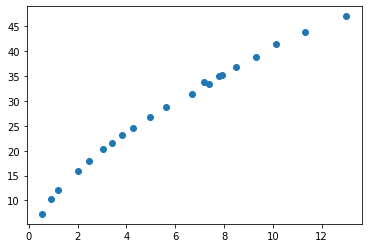

In [15]:
plt.scatter(I3, V3)

.

In [16]:
"""fig, axs = plt.subplots(1,2, figsize =  (18,5))
graf(I1,V1,0,0, 3, "3V")
res(V1,I1,graf(V1,I1,0,0, -1, "3V"), axs[1] )
plt.savefig('003Vn.png')

fig, axs = plt.subplots(1,2, figsize =  (18,5))
graf(I2,V2,0,0, 3, "9V")
res(V2,I2,graf(V2,I2,0,0, -1, "9V"), axs[1] )
plt.savefig('009Vn.png')


fig, axs = plt.subplots(1,2, figsize =  (18,5))
graf(I3,V3,0,0, 3, "24V")
res(V3,I3,graf(V3,I3,0,0, -1, "24V"), axs[1] )
plt.savefig('024Vn.png')


fig, axs = plt.subplots(1,2, figsize =  (18,5))
graf(I4,V4,0,0, 3, "54V")
res(V4,I4,graf(V4,I4,0,0, -1, "54V"), axs[1] )
plt.savefig('054Vn.png')


fig, axs = plt.subplots(1,2, figsize =  (18,5))
graf(I5,V5,0,0, 3, "115V")
res(V5,I5,graf(V5,I5,0,0, -1, "115V"), axs[1] )
plt.savefig('115Vn.png')"""


'fig, axs = plt.subplots(1,2, figsize =  (18,5))\ngraf(I1,V1,0,0, 3, "3V")\nres(V1,I1,graf(V1,I1,0,0, -1, "3V"), axs[1] )\nplt.savefig(\'003Vn.png\')\n\nfig, axs = plt.subplots(1,2, figsize =  (18,5))\ngraf(I2,V2,0,0, 3, "9V")\nres(V2,I2,graf(V2,I2,0,0, -1, "9V"), axs[1] )\nplt.savefig(\'009Vn.png\')\n\n\nfig, axs = plt.subplots(1,2, figsize =  (18,5))\ngraf(I3,V3,0,0, 3, "24V")\nres(V3,I3,graf(V3,I3,0,0, -1, "24V"), axs[1] )\nplt.savefig(\'024Vn.png\')\n\n\nfig, axs = plt.subplots(1,2, figsize =  (18,5))\ngraf(I4,V4,0,0, 3, "54V")\nres(V4,I4,graf(V4,I4,0,0, -1, "54V"), axs[1] )\nplt.savefig(\'054Vn.png\')\n\n\nfig, axs = plt.subplots(1,2, figsize =  (18,5))\ngraf(I5,V5,0,0, 3, "115V")\nres(V5,I5,graf(V5,I5,0,0, -1, "115V"), axs[1] )\nplt.savefig(\'115Vn.png\')'

In [17]:
def gra3 (I, V, vol):
    i = np.array(I*1/1000)
    #print(len(i1), V1.size())
    plt.scatter(i,V , alpha = 0.4, label =vol)
    plt.xlabel("Corriente (A)")
    plt.ylabel("Voltaje (V)")


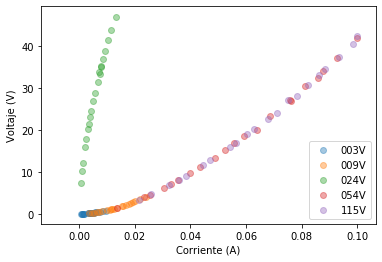

In [18]:
gra3(I1, V1, '003V')
gra3(I2, V2, '009V')
gra3(I3, V3, '024V')
gra3(I4, V4, '054V')
gra3(I5, V5, '115V')
plt.legend()
plt.savefig('er4.png')